In [ ]:
# import tensorflow as tf
# from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras import layers



In [ ]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Define the CNN architecture
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [ ]:
# Compile the model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model
history1 = model1.fit(x_train, y_train, epochs=10,batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5214 - accuracy: 0.4445 - val_loss: 1.2906 - val_accuracy: 0.5338
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1688 - accuracy: 0.5845 - val_loss: 1.0972 - val_accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0249 - accuracy: 0.6405 - val_loss: 0.9856 - val_accuracy: 0.6518
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9261 - accuracy: 0.6742 - val_loss: 0.9949 - val_accuracy: 0.6525
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8548 - accuracy: 0.7017 - val_loss: 0.8785 - val_accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7981 - accuracy: 0.7198 - val_loss: 0.8701 - val_accuracy: 0.6960
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7503 - accuracy: 0.7378 - val_loss: 0.9114 - val_accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.8411 - accuracy: 0.7153 - 605ms/epoch - 2ms/step
Test accuracy: 0.7153000235557556


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.datasets import cifar10

In [ ]:


from PIL import Image
import numpy as np

# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# define the target size
target_size = (128, 128)

# create an empty array to store the resized images
x_train_resized = np.empty((len(x_train), target_size[0], target_size[1], 3), dtype=np.uint8)
x_test_resized = np.empty((len(x_test), target_size[0], target_size[1], 3), dtype=np.uint8)

# loop through the training set and resize the images
for i in range(len(x_train)):
    im = Image.fromarray(x_train[i])
    im_resized = im.resize(target_size)
    x_train_resized[i] = np.array(im_resized)

# loop through the test set and resize the images
for i in range(len(x_test)):
    im = Image.fromarray(x_test[i])
    im_resized = im.resize(target_size)
    x_test_resized[i] = np.array(im_resized)


print(x_train.shape,x_test.shape)
print(x_train_resized.shape, x_test_resized.shape)
print(y_train.shape,y_test.shape)






(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 128, 128, 3) (10000, 128, 128, 3)
(50000, 1) (10000, 1)


In [ ]:
def preprocess_data(X, Y):
  
    X_p = keras.applications.resnet50.preprocess_input(X)
    
    Y_p = keras.utils.to_categorical(Y, 10)
    return X_p, Y_p



In [ ]:
x_train_resized, y_train = preprocess_data(x_train_resized, y_train)
x_test_resized, y_test = preprocess_data(x_test_resized, y_test)

In [ ]:
# Load the pre-trained ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(128, 128, 3))




In [ ]:
# Freeze all but last layer in the ResNet50 model
for layer in resnet.layers[:143]:
    layer.trainable = False

# print layers, identifying if trainable or not
for i, layer in enumerate(resnet.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [ ]:
# Add new layers on top of the ResNet50 model and resize input images\
model = keras.Sequential()
model.add(resnet)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train_resized, y_train, batch_size=32, epochs=10, validation_data=(x_test_resized, y_test))

Epoch 1/10
1563/1563 [==============================] - 52s 25ms/step - loss: 0.8756 - accuracy: 0.7416 - val_loss: 0.3548 - val_accuracy: 0.8860
Epoch 2/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.5027 - accuracy: 0.8632 - val_loss: 0.2785 - val_accuracy: 0.9093
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3918 - accuracy: 0.8931 - val_loss: 0.2803 - val_accuracy: 0.9149
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3233 - accuracy: 0.9110 - val_loss: 0.2583 - val_accuracy: 0.9236
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2654 - accuracy: 0.9284 - val_loss: 0.2849 - val_accuracy: 0.9134
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.2238 - accuracy: 0.9401 - val_loss: 0.2599 - val_accuracy: 0.9243
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.1949 - accuracy: 0.9479 - val_loss: 0.2805 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.3114 - accuracy: 0.9268 - 3s/epoch - 9ms/step
Test accuracy: 0.926800012588501


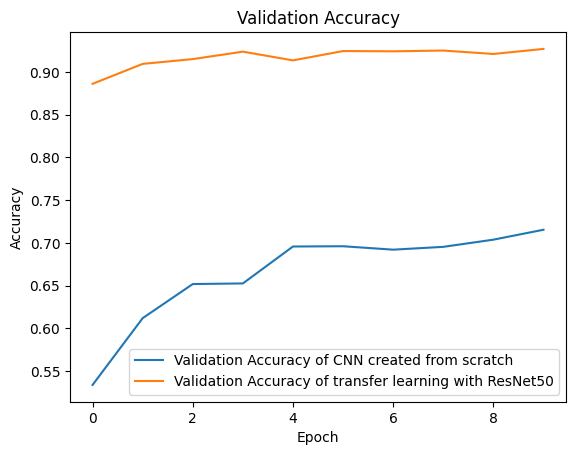

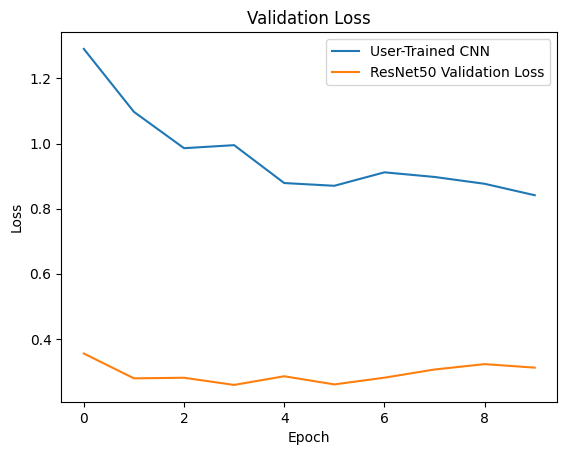

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy of CNN created from scratch')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy of transfer learning with ResNet50')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history1.history['val_loss'], label='User-Trained CNN')
plt.plot(history.history['val_loss'], label='ResNet50 Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()